# Loan Prediction Using Machine Learning 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

# Reading  Training and Testing Dataset

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv') 

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# Calculating Some statistical Mathematics on our Train Dataset

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


/home/jeanndo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome'>

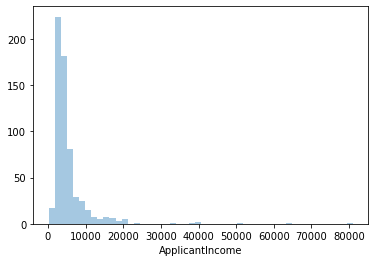

In [28]:
sns.distplot(train['ApplicantIncome'],kde=False)

/home/jeanndo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

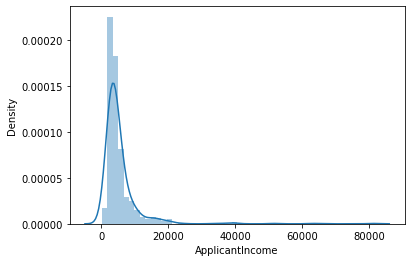

In [26]:
sns.distplot(train['ApplicantIncome'].dropna())

# Checking Education Level Against Level Income

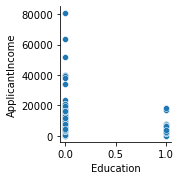

In [24]:
sns.pairplot(x_vars="Education",y_vars="ApplicantIncome",data=train)

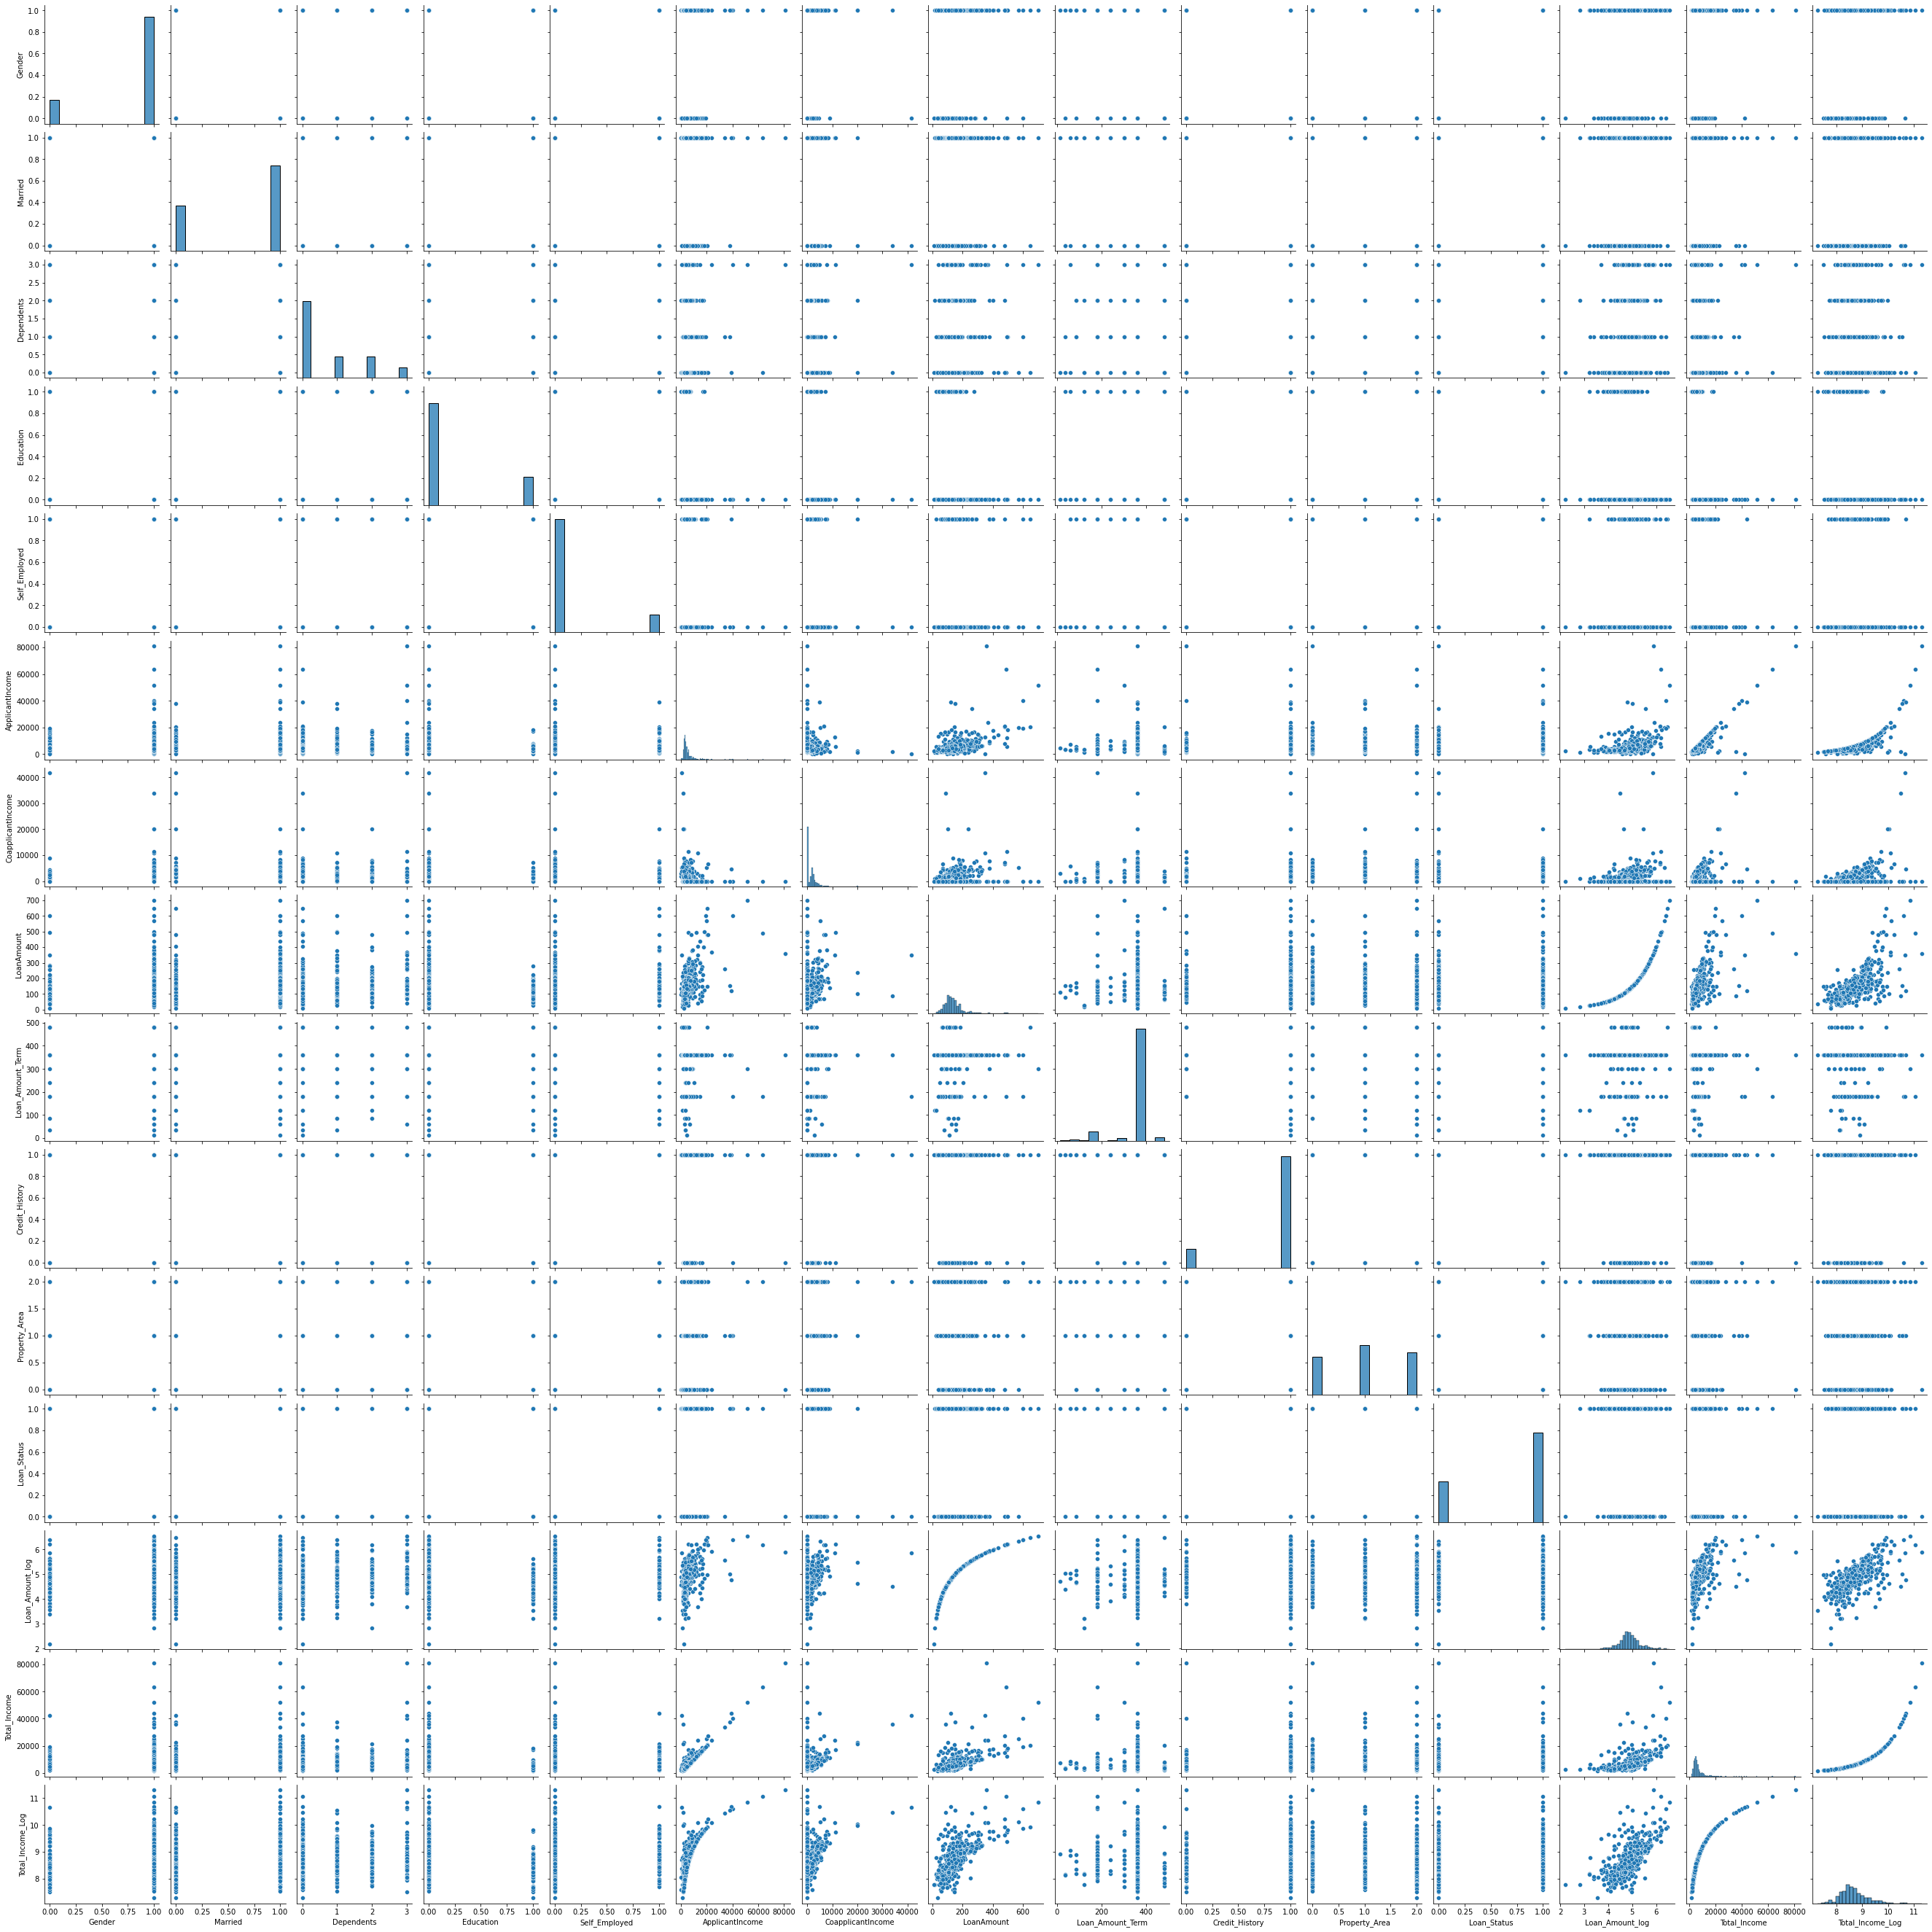

In [25]:
sns.pairplot(train)

# Turning Loan Status into Binary

In [12]:
modified_loan_status = train

modified_loan_status['Loan_Status'] = train['Loan_Status'].apply(lambda x: 0 if x=='N' else 1)

# Calculating The Mean
modified_loan_status.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

# Checking Missing Data In Train Dataset

In [13]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Categorizing and filling Missing Values

In [14]:
# CATEGORICAL DATA

train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

# NUMERICAL DATA
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

In [15]:
train['Loan_Amount_log'] = np.log(train['LoanAmount'])
train['Total_Income']  = train['ApplicantIncome'] + train['CoapplicantIncome']
train['Total_Income_Log']=np.log(train['Total_Income'])


/home/jeanndo/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log'>

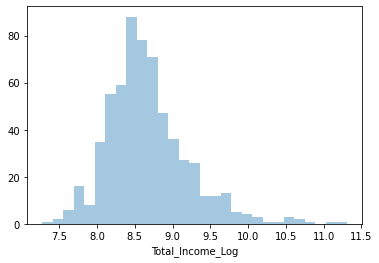

In [36]:
sns.distplot(train['Total_Income_Log'],kde=False)

# MODELING

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Loan_Amount_log', 'Total_Income', 'Total_Income_Log'],
      dtype='object')

In [19]:
category = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
encoder = LabelEncoder()

for i in category:
    train[i] = encoder.fit_transform(train[i])

train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
Loan_Amount_log      float64
Total_Income         float64
Total_Income_Log     float64
dtype: object

# Now all our Variables have became numbers that our model can understand

In [20]:
# Import Models

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold      #for k-fold model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


In [21]:
def classification_model(model,data,predictors,outcomes):
    #Firt model
    model.fit(data[predictors],data[outcomes])
    
    #Make prediction on training set
    
    predictions = model.predict(data[predictors])
    
    #print accuracy
    
    accuracy = metrics.accuracy_score(predictions,data[outcomes])
    print("Accuracy %s" % "{0:.3%}".format(accuracy))
    
    #Perform k-fold model_selection with 5 folds
    
    kf = KFold(data.shape[0],n_splits == 5)
    error = []
    
    for train ,test in kf:
    #Filter  training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we are using to train our algorithm
        train_target = data[outcome].iloc[train]
    
    # Training algorithm using predictors and target
        model.fit(train_predictors,train_target)
    
    # Record error from each  model_selection run
        error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    
    print("Model_selection Score: %s" % "{0:.3%}".format(np.mean(error)))

# Test Different Models

In [22]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,train,predictor_var,outcome_var)

Accuracy 80.945%


NameError: name 'n_splits' is not defined

In [23]:
model = RandomForestClassifier(n_estimators=100)
predictor_var =['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Amount_log','Total_Income_Log']

classification_model(model,train,predictor_var,outcome_var)

Accuracy 100.000%


NameError: name 'n_splits' is not defined